In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('main.csv')

In [5]:
df = df.drop(columns=['PassengerId','Name','Sex','Pclass','Ticket','Cabin','Embarked'])

In [6]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [7]:
df['family'] = df['SibSp'] + df['Parch']

In [8]:
df = df.drop(columns=['Parch','SibSp'])
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   family    891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [10]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
family       0.00000
dtype: float64

In [11]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [14]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2368.2468324201386
Fare Variance after 999 wala imputation:  2368.2468324201386
Fare Variance after -1 wala imputation:  2368.2468324201386


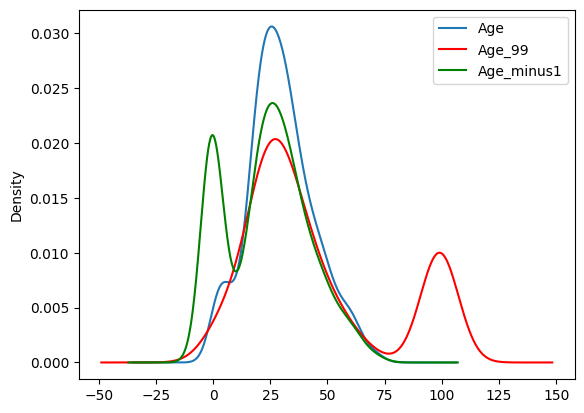

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

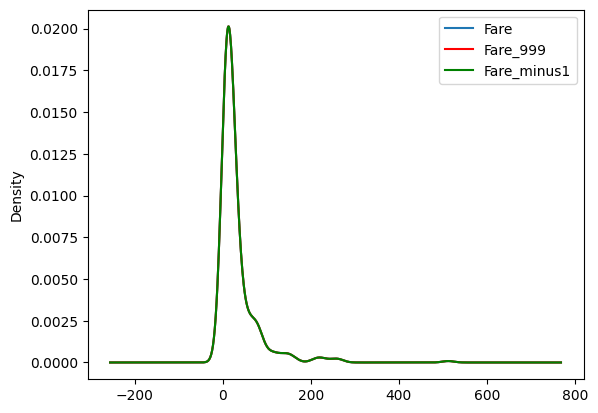

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [17]:
X_train.cov()

,Age,Fare,family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,71.512440,-6.498901,204.349513,204.349513,71.512440,71.512440
Fare,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832
family,-6.498901,16.847264,2.735252,-7.387287,-4.149246,16.847264,16.847264
Age_99,204.349513,-101.053412,-7.387287,951.727557,-189.535540,-101.053412,-101.053412
Age_minus1,204.349513,126.761454,-4.149246,-189.535540,318.089620,126.761454,126.761454
Fare_999,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832
Fare_minus1,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832


In [18]:
X_train.corr()

,Age,Fare,family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.095814,-0.299113,1.000000,1.000000,0.095814,0.095814
Fare,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000
family,-0.299113,0.209323,1.000000,-0.144787,-0.140668,0.209323,0.209323
Age_99,1.000000,-0.067310,-0.144787,1.000000,-0.344476,-0.067310,-0.067310
Age_minus1,1.000000,0.146049,-0.140668,-0.344476,1.000000,0.146049,0.146049
Fare_999,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000
Fare_minus1,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [21]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [22]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [23]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [24]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]], shape=(712, 3))